<a href="https://colab.research.google.com/github/072arushi/Richies-of-2021/blob/main/500_Richest_People_in_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Libraries Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")

Dataset Import

In [ ]:
richest = pd.read_csv('/content/drive/MyDrive/500 richest people 2021.csv',sep=';')
richest.head()

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology,NaN,NaN,NaN,NaN
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology,NaN,NaN,NaN,NaN
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer,NaN,NaN,NaN,NaN
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology,NaN,NaN,NaN,NaN
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology,NaN,NaN,NaN,NaN


Data Preprocessing/ Cleaning

In [ ]:
#Basic information about dataset
richest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             499 non-null    float64
 1   Name             499 non-null    object 
 2   Total Net Worth  499 non-null    object 
 3   $ Last Change    499 non-null    object 
 4   $ YTD Change     499 non-null    object 
 5   Country          499 non-null    object 
 6   Industry         499 non-null    object 
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 43.4+ KB


In [ ]:
#Dropping Null columns
richest.drop(columns=['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],inplace=True)

#Dropping Null Rows
richest.dropna(how='all',inplace=True)

In [ ]:
#Checking for duplicates
richest.duplicated().value_counts()

False    499
dtype: int64

In [ ]:
def change(df, col):
    df[col] = df[col].replace({'\$':''}, regex =  True)

def clear(x):
    if 'M' in x:
        return float(x.rstrip('M')) / 1000
    elif 'k' in x:
        return float(x.rstrip('k')) / 10 ** 6
    else:
        return float(x.rstrip('B'))

change(richest, '$ Last Change')
richest['$ Last Change'] = richest['$ Last Change'].apply(clear)

In [ ]:
#Changing DataTypes with some String Replacement

richest['Total Net Worth'].replace(to_replace='family',value='$17.8B',inplace=True)
richest['Total Net Worth'] = richest['Total Net Worth'].str.replace('$','').str.replace('B','').apply(pd.to_numeric)

#Correcting the spelling
richest['Country'].replace('Canda','Canada',inplace=True)

### **Visualisation**

Top 10 rich people in the world

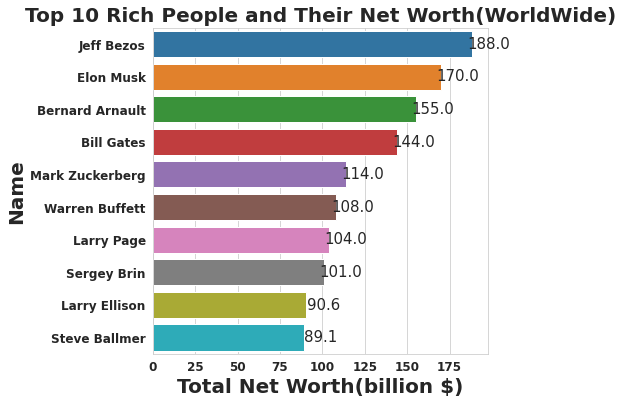

In [ ]:
fig= plt.figure(figsize=(6,6))
top10_person=richest[:10]
plots=sns.barplot(x='Total Net Worth',y='Name',data=top10_person)

plt.title("Top 10 Rich People and Their Net Worth(WorldWide)",fontsize=20,fontweight='bold')
plt.ylabel("Name",fontsize=20,fontweight='bold')
plt.xlabel("Total Net Worth(billion $)",fontsize=20,fontweight='bold')

for bar in plots.patches:
    plots.annotate(bar.get_width(),(bar.get_x()+bar.get_width()+7,
                                   bar.get_y()+0.7),size=15,ha='center',
                  va='center',xytext=(5,10),textcoords='offset points')

plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Rich People With their Country and Industry

In [ ]:
def top10(column1,column2):
    global top10_person
    sns.catplot(x=column1,y=column2,data=top10_person,marker='D',orient='h',linewidth=2)
    plt.title("Top 10 Rich People and Their {} (WorldWide)".format(column1),fontsize=20,fontweight='bold',color='red')
    plt.ylabel(column2,fontsize=20,fontweight='bold')
    plt.xlabel(column1,fontsize=20,fontweight='bold')

    plt.xticks(fontsize=13,fontweight='bold')
    plt.yticks(fontweight='bold',fontsize=12)
    plt.show()

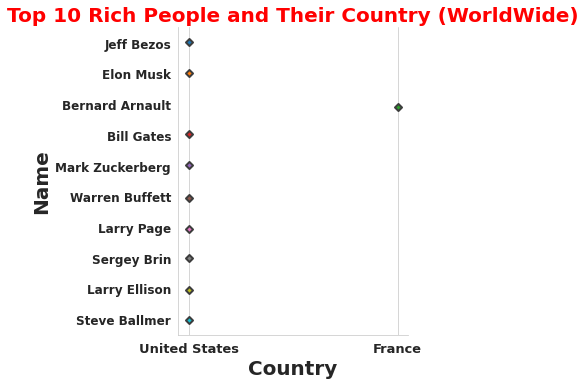

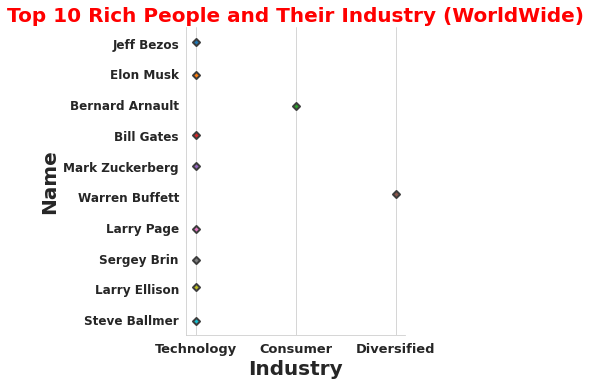

In [ ]:
#Loop to Call the function
cols=[['Country','Name'],['Industry','Name']]
for item1,item2 in cols:
    top10(item1,item2)

Distribution of Total Net Worth Worlwide

16.233907815631266


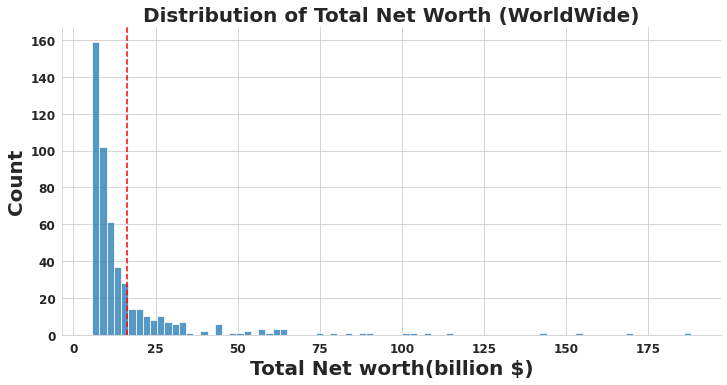

In [ ]:
#mean to plot the mean line
mean=richest['Total Net Worth'].mean()
print(mean)

sns.displot(x='Total Net Worth',data=richest,aspect=2)

plt.title("Distribution of Total Net Worth (WorldWide)",fontsize=20,fontweight='bold')
plt.ylabel("Count",fontsize=20,fontweight='bold')
plt.xlabel("Total Net worth(billion $)",fontsize=20,fontweight='bold')

#plotting mean line 
plt.axvline(mean,linestyle='--',color='red',label='Mean of Net Worth')

plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Distribution of Industries Around The World

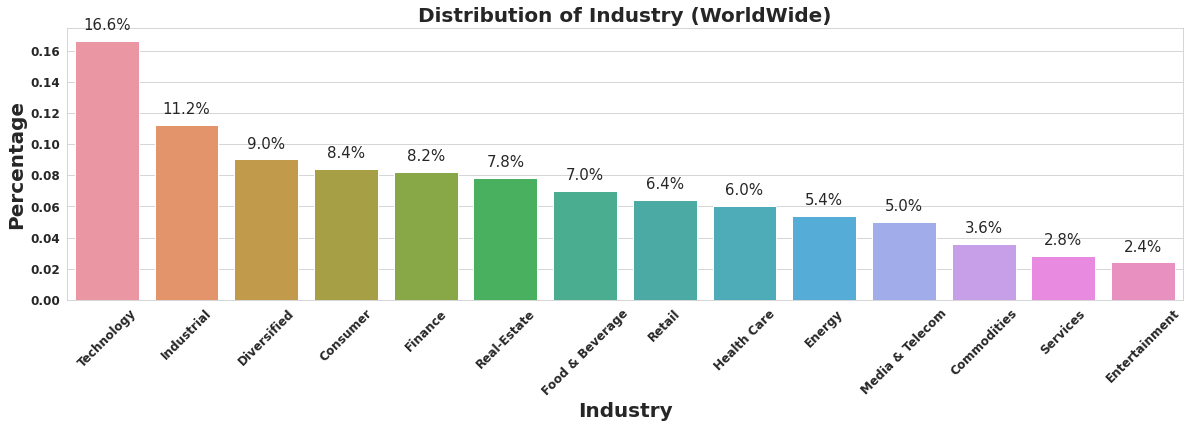

In [ ]:
fig= plt.figure(figsize=(20,5))

#Grouping the Industries and counting
g=richest.groupby(by='Industry',as_index=False)['Industry'].count().sort_values(ascending=False,by='Industry')

#Making a percentage column to label them on bars
values=richest.Industry.value_counts()
g['Percent']=(values.values)/len(richest)

count=g['Percent']
names=richest['Industry'].value_counts().sort_values(ascending=False).index  

plot=sns.barplot(x=names,y=count,data=g)

plt.title("Distribution of Industry (WorldWide)",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industry",fontsize=20,fontweight='bold')

#Labeling the bars 
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.01%'),
                   (bar.get_x()+bar.get_width() / 2,bar.get_height()),
                   size=15,ha='center',va='bottom',xytext=(0,8),
                   textcoords='offset points')

plt.xticks(fontsize=12,fontweight='bold',rotation=45)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Distibution Of Countries Worldwide

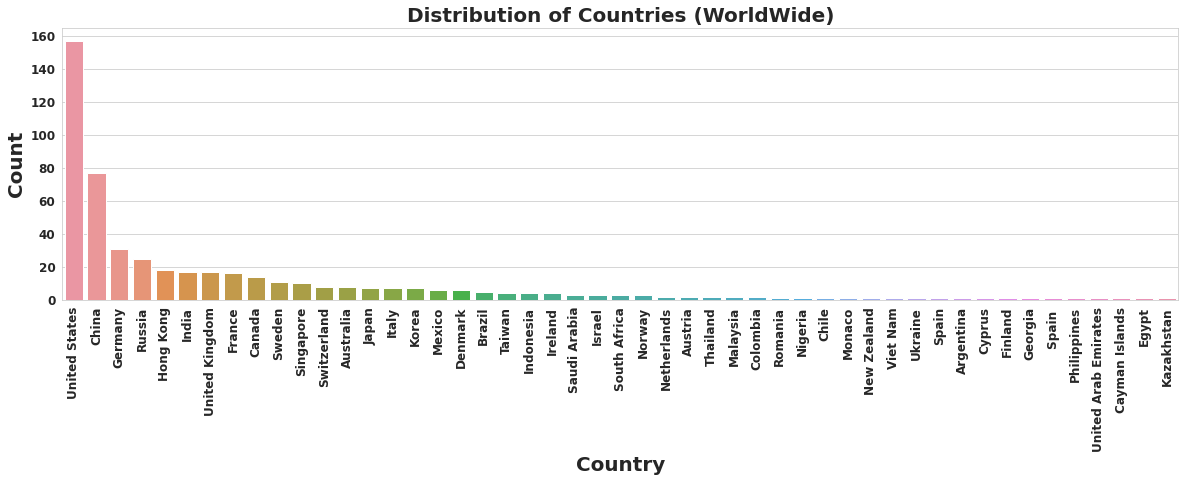

In [ ]:
fig= plt.figure(figsize=(20,5))
count=richest['Country'].value_counts().sort_values(ascending=False)
names=richest['Country'].value_counts().sort_values(ascending=False).index
sns.barplot(x=names,y=count,data=richest)

plt.title("Distribution of Countries (WorldWide)",fontsize=20,fontweight='bold')
plt.ylabel("Count",fontsize=20,fontweight='bold')
plt.xlabel("Country",fontsize=20,fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold',rotation=90)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Last Change in the Total Worth of top 10 Riches

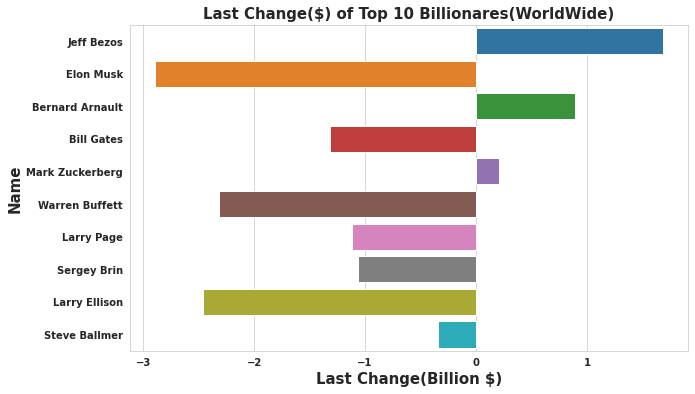

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='$ Last Change',y='Name',data=richest[:10],orient='h')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Last Change(Billion $)",fontweight='bold',fontsize=15)
plt.ylabel("Name",fontweight='bold',fontsize=15)
plt.title("Last Change($) of Top 10 Billionares(WorldWide)",fontweight='bold',fontsize=15)
plt.show()

Average Worth of Top 10 Countries

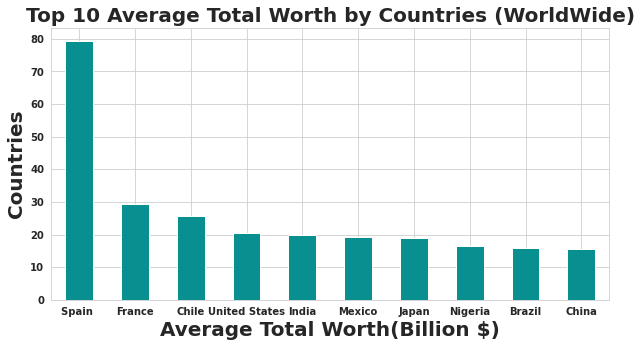

In [ ]:
#grouping the Countries to find their Average Worth
grouped= richest.groupby(by='Country',as_index=False)['Total Net Worth'].mean().sort_values(ascending=False,by='Total Net Worth')

bars=grouped.head(10).plot(kind='bar',x='Country',y='Total Net Worth',legend=None,color='#088F8F',figsize=(10,5))

plt.xlabel("Average Total Worth(Billion $)",fontsize=20,fontweight='bold')
plt.ylabel("Countries",fontsize=20,fontweight='bold')
plt.title("Top 10 Average Total Worth by Countries (WorldWide)",fontsize=20,fontweight='bold')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')


plt.show()

Average Worth of Top 10 Industries

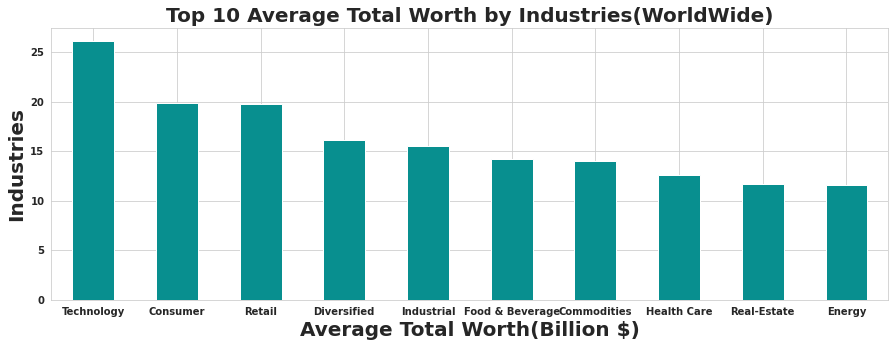

In [ ]:
#grouping Industries to get average net worth of them
grouped= richest.groupby(by='Industry',as_index=False)['Total Net Worth'].mean().sort_values(ascending=False,by='Total Net Worth')

grouped.head(10).plot(kind='bar',x='Industry',y='Total Net Worth',legend=None,color='#088F8F',figsize=(15,5))

plt.xlabel("Average Total Worth(Billion $)",fontsize=20,fontweight='bold')
plt.ylabel("Industries",fontsize=20,fontweight='bold')
plt.title("Top 10 Average Total Worth by Industries(WorldWide)",fontsize=20,fontweight='bold')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')


plt.show()

### Visualisation for Rich People in Asia

Percentage of Riches by Country

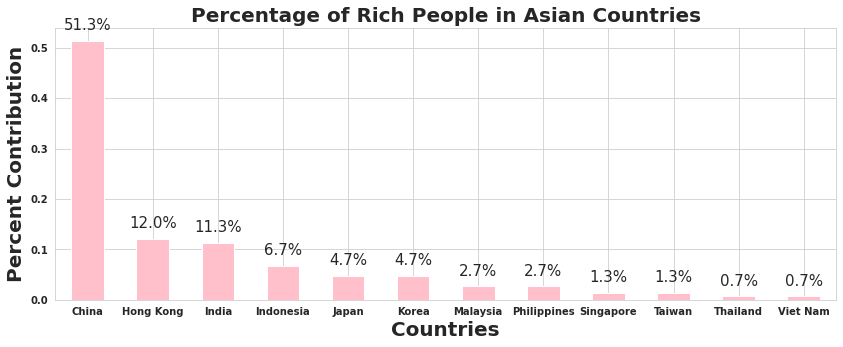

In [ ]:
#Making different Dataset for Asian countries
Asia= richest.loc[(richest['Country']=='India') | (richest['Country']=='China') | (richest['Country']=='Hong Kong') | (richest['Country']=='Singapore')
                 | (richest['Country']=='Korea') | (richest['Country']=='Japan') | (richest['Country']=='Indonesia') |(richest['Country']=='Taiwan')
                 | (richest['Country']=='Thailand') | (richest['Country']=='Malaysia') | (richest['Country']=='Viet Nam') | (richest['Country']=='Philippines')]

#grouping by country to get the % of rich in Asian countries
grouped=Asia.groupby(by='Country',as_index=False)['Total Net Worth'].mean()

values=Asia.Country.value_counts()
grouped['Percent']=(values.values)/len(Asia)

plot=grouped.plot(x='Country',y='Percent',kind='bar',figsize=(14,5),legend=None,color='pink')

plt.xlabel("Countries",fontsize=20,fontweight='bold')
plt.ylabel("Percent Contribution",fontsize=20,fontweight='bold')
plt.title("Percentage of Rich People in Asian Countries",fontsize=20,fontweight='bold')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.01%'),
                   (bar.get_x()+bar.get_width() / 2,bar.get_height()),
                   size=15,ha='center',va='bottom',xytext=(0,8),
                   textcoords='offset points')

plt.show()

Distribution of Industry in Asia

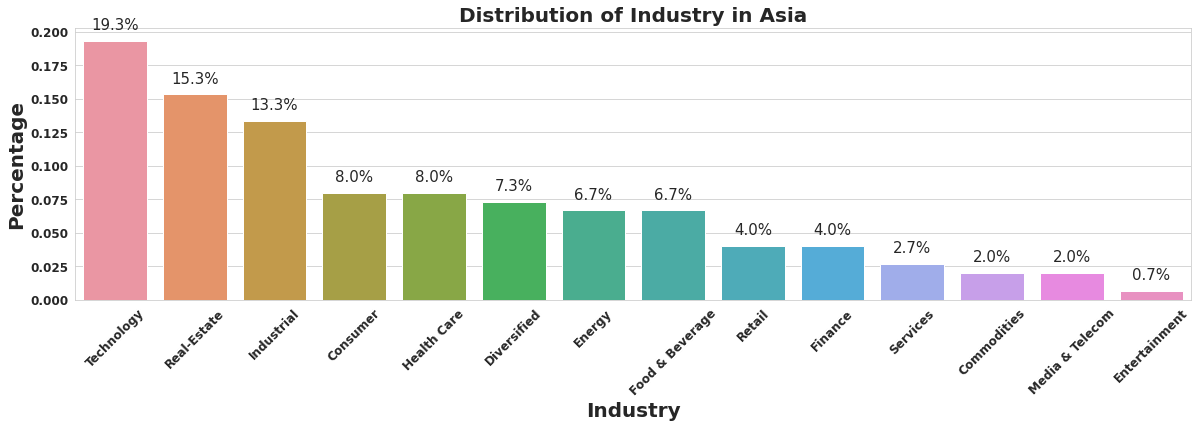

In [ ]:
fig= plt.figure(figsize=(20,5))

g=Asia.groupby(by='Industry',as_index=False)['Industry'].count().sort_values(ascending=False,by='Industry')

values=Asia.Industry.value_counts()
g['Percent']=(values.values)/len(Asia)

count=g['Percent']
names=Asia['Industry'].value_counts().sort_values(ascending=False).index
plot=sns.barplot(x=names,y=count,data=g)

plt.title("Distribution of Industry in Asia",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industry",fontsize=20,fontweight='bold')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.01%'),
                   (bar.get_x()+bar.get_width() / 2,bar.get_height()),
                   size=15,ha='center',va='bottom',xytext=(0,8),
                   textcoords='offset points')

plt.xticks(fontsize=12,fontweight='bold',rotation=45)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Top 10 Riches in Asia

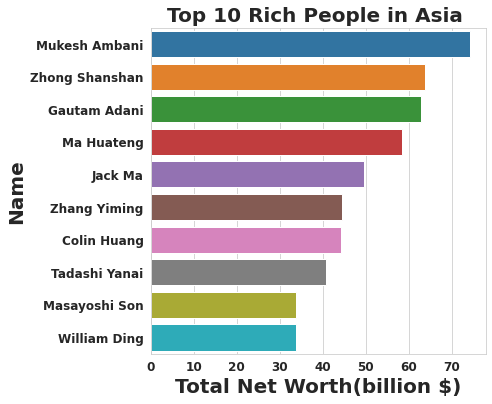

In [ ]:
fig= plt.figure(figsize=(6,6))
top_asia=Asia.head(10)
sns.barplot(x='Total Net Worth',y='Name',data=top_asia)

plt.title("Top 10 Rich People in Asia ",fontsize=20,fontweight='bold')
plt.ylabel("Name",fontsize=20,fontweight='bold')
plt.xlabel("Total Net Worth(billion $)",fontsize=20,fontweight='bold')


plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Top 10 riches by Countries and Industries in Asia

In [ ]:
#function to plot multiple graphs
def top10(column1,column2):
    global top_asia
   
    sns.catplot(x=column1,y=column2,data=top_asia,marker='D',orient='h',linewidth=2)
    plt.title("Top 10 Billionares of Asia and Their {}".format(column1),fontsize=20,fontweight='bold',color='red')
    plt.ylabel(column2,fontsize=20,fontweight='bold')
    plt.xlabel(column1,fontsize=20,fontweight='bold')

    plt.xticks(fontsize=13,fontweight='bold',rotation=45)
    plt.yticks(fontweight='bold',fontsize=12)
    plt.show()

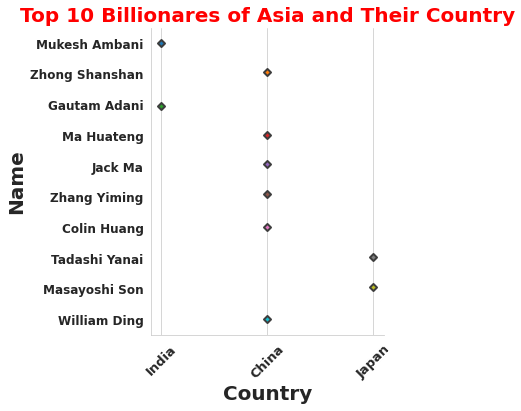

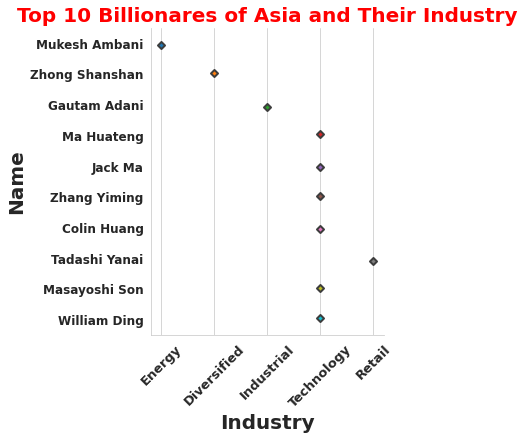

In [ ]:
#Loop to Call the function
cols=[['Country','Name'],['Industry','Name']]
for item1,item2 in cols:
    top10(item1,item2)

Last Change Of the Riches in Asia

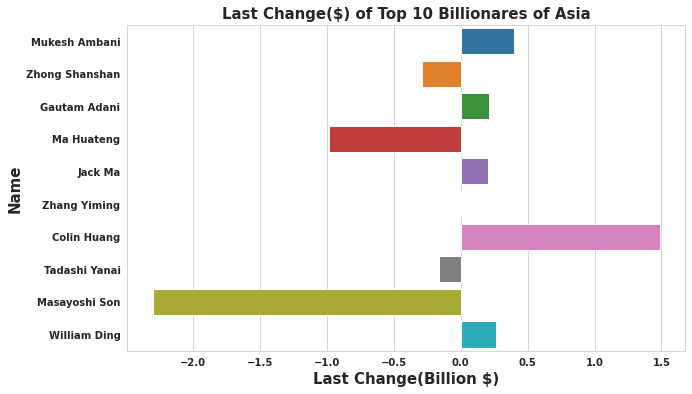

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='$ Last Change',y='Name',data=Asia[:10],orient='h')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Last Change(Billion $)",fontweight='bold',fontsize=15)
plt.ylabel("Name",fontweight='bold',fontsize=15)
plt.title("Last Change($) of Top 10 Billionares of Asia",fontweight='bold',fontsize=15)
plt.show()

Average Worth by Countries in Asia

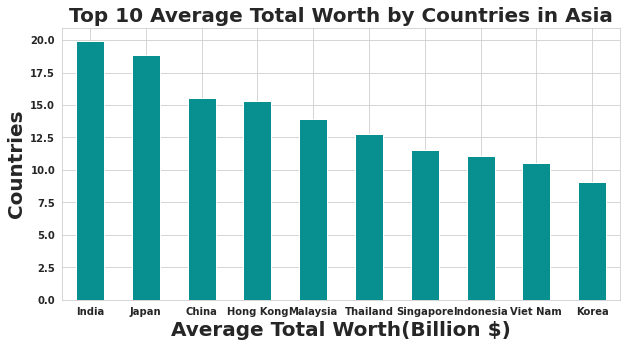

In [ ]:
grouped= Asia.groupby(by='Country',as_index=False)['Total Net Worth'].mean().sort_values(ascending=False,by='Total Net Worth')

grouped.head(10).plot(kind='bar',x='Country',y='Total Net Worth',legend=None,color='#088F8F',figsize=(10,5))

plt.xlabel("Average Total Worth(Billion $)",fontsize=20,fontweight='bold')
plt.ylabel("Countries",fontsize=20,fontweight='bold')
plt.title("Top 10 Average Total Worth by Countries in Asia",fontsize=20,fontweight='bold')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')


plt.show()

Average Worth by Industries in Asia

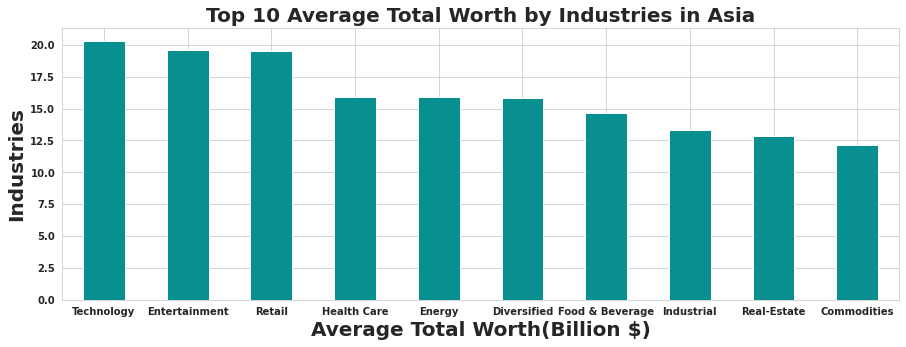

In [ ]:
grouped= Asia.groupby(by='Industry',as_index=False)['Total Net Worth'].mean().sort_values(ascending=False,by='Total Net Worth')

grouped.head(10).plot(kind='bar',x='Industry',y='Total Net Worth',legend=None,color='#088F8F',figsize=(15,5))

plt.xlabel("Average Total Worth(Billion $)",fontsize=20,fontweight='bold')
plt.ylabel("Industries",fontsize=20,fontweight='bold')
plt.title("Top 10 Average Total Worth by Industries in Asia",fontsize=20,fontweight='bold')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')


plt.show()

### Visualisation for Rich People in India

In [ ]:
#Making Dataset for Country India
India=richest[richest['Country']=='India']

Top 10 Riches of India

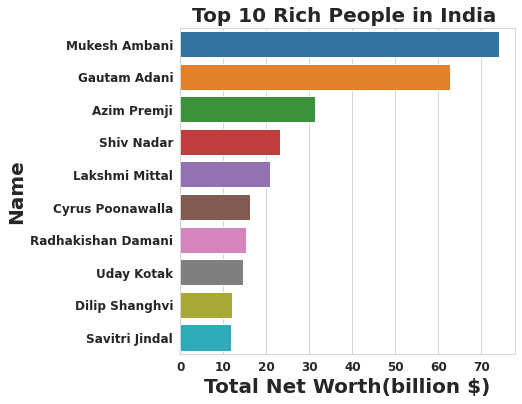

In [ ]:
fig= plt.figure(figsize=(6,6))
sns.barplot(x='Total Net Worth',y='Name',data=India[:10])


plt.title("Top 10 Rich People in India ",fontsize=20,fontweight='bold')
plt.ylabel("Name",fontsize=20,fontweight='bold')
plt.xlabel("Total Net Worth(billion $)",fontsize=20,fontweight='bold')


plt.xticks(fontweight='bold',fontsize=12)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Billionares And Their Industries in India

<Figure size 720x360 with 0 Axes>

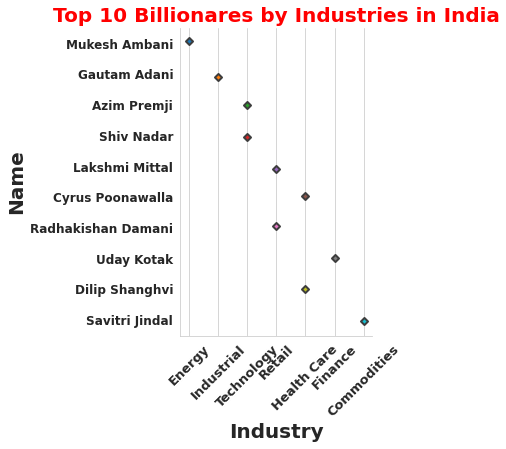

In [ ]:
fig=plt.figure(figsize=(10,5))

sns.catplot(x='Industry',y='Name',data=India[:10],marker='D',orient='h',linewidth=2)
plt.title("Top 10 Billionares by Industries in India",fontsize=20,fontweight='bold',color='red')
plt.ylabel("Name",fontsize=20,fontweight='bold')
plt.xlabel("Industry",fontsize=20,fontweight='bold')

plt.xticks(fontsize=13,fontweight='bold',rotation=45)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

Disrtibution of Industry in Asia

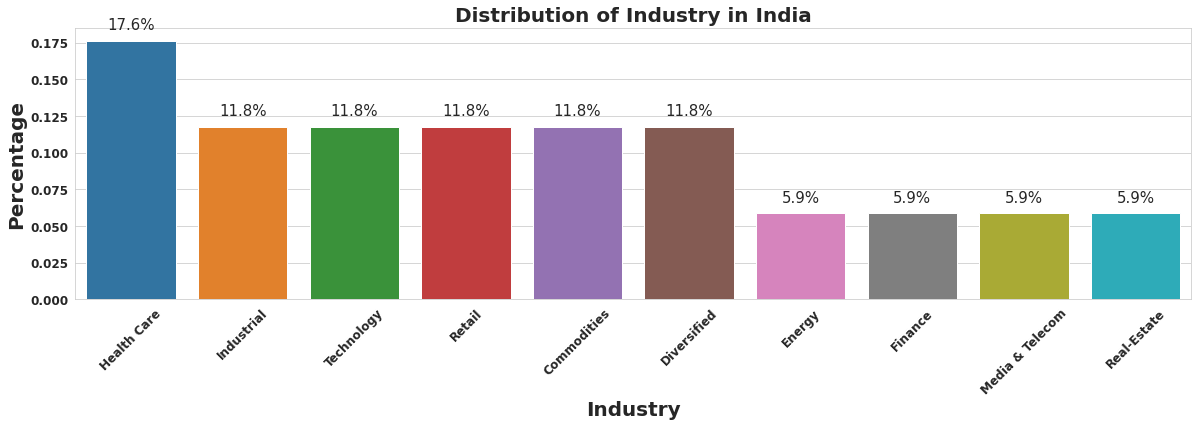

In [ ]:
fig= plt.figure(figsize=(20,5))

#Grouping the dataset by industry
g=India.groupby(by='Industry',as_index=False)['Industry'].count().sort_values(ascending=False,by='Industry')

#finding percentage of people belong to perticular industry
values=India.Industry.value_counts()
g['Percent']=(values.values)/len(India)

count=g['Percent']
names=India['Industry'].value_counts().sort_values(ascending=False).index
plot=sns.barplot(x=names,y=count,data=g)

plt.title("Distribution of Industry in India",fontsize=20,fontweight='bold')
plt.ylabel("Percentage",fontsize=20,fontweight='bold')
plt.xlabel("Industry",fontsize=20,fontweight='bold')

#Plotting bar labels
for bar in plot.patches:
    plot.annotate(format(bar.get_height(),'.01%'),
                   (bar.get_x()+bar.get_width() / 2,bar.get_height()),
                   size=15,ha='center',va='bottom',xytext=(0,8),
                   textcoords='offset points')

plt.xticks(fontsize=12,fontweight='bold',rotation=45)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()

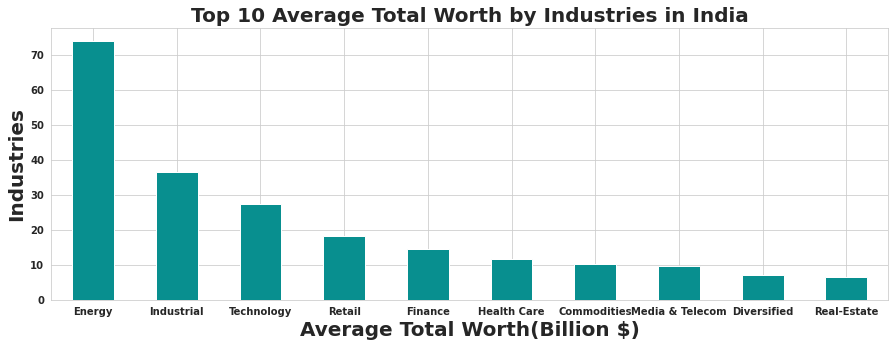

In [ ]:
#Grouping the industry to find the average Net Worth of riches in india
grouped= India.groupby(by='Industry',as_index=False)['Total Net Worth'].mean().sort_values(ascending=False,by='Total Net Worth')

grouped.head(10).plot(kind='bar',x='Industry',y='Total Net Worth',legend=None,color='#088F8F',figsize=(15,5))

plt.xlabel("Average Total Worth(Billion $)",fontsize=20,fontweight='bold')
plt.ylabel("Industries",fontsize=20,fontweight='bold')
plt.title("Top 10 Average Total Worth by Industries in India",fontsize=20,fontweight='bold')
plt.xticks(rotation=0,fontweight='bold')
plt.yticks(fontweight='bold')


plt.show()

Last Change of top 10 billionares of India

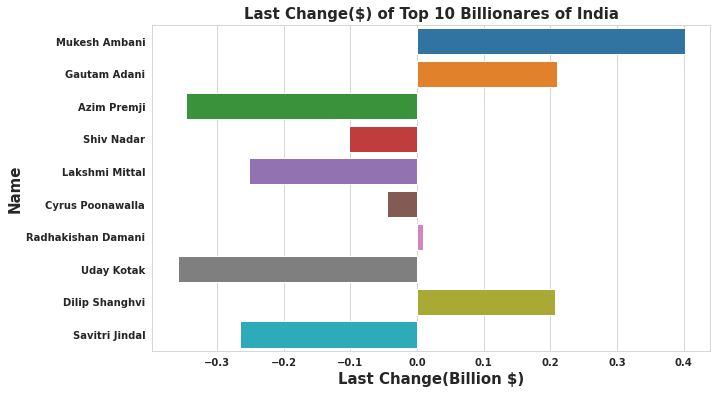

In [ ]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='$ Last Change',y='Name',data=India[:10],orient='h')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Last Change(Billion $)",fontweight='bold',fontsize=15)
plt.ylabel("Name",fontweight='bold',fontsize=15)
plt.title("Last Change($) of Top 10 Billionares of India",fontweight='bold',fontsize=15)
plt.show()

### Billionares from Entertainment Industry and Their Countries

<Figure size 720x360 with 0 Axes>

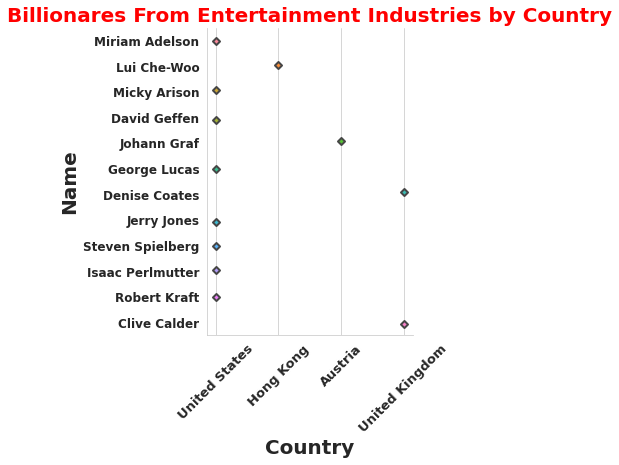

In [ ]:
fig=plt.figure(figsize=(10,5))
entertainment=richest[richest['Industry']=='Entertainment']
sns.catplot(x='Country',y='Name',data=entertainment,marker='D',orient='h',linewidth=2)
plt.title("Billionares From Entertainment Industries by Country",fontsize=20,fontweight='bold',color='red')
plt.ylabel("Name",fontsize=20,fontweight='bold')
plt.xlabel("Country",fontsize=20,fontweight='bold')

plt.xticks(fontsize=13,fontweight='bold',rotation=45)
plt.yticks(fontweight='bold',fontsize=12)
plt.show()